# Import dataset 

In [1]:
!pip install kaggle

In [11]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [0]:
import json

token = {"username":"thomaskhu","key":"45346bd1ed232eb4d8d2d96a6ca7f473"}


with open('/content/.kaggle/kaggle.json','w') as file:
    json.dump(token, file)

In [13]:
!chmod 600 /root/.kaggle

!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v /content


- path is now set to: /content


In [14]:
!kaggle competitions download -c quora-insincere-questions-classification

 80% 44.0M/54.9M [00:00<00:00, 53.9MB/s]
100% 54.9M/54.9M [00:00<00:00, 102MB/s] 
  0% 0.00/4.09M [00:00<?, ?B/s]
100% 4.09M/4.09M [00:00<00:00, 136MB/s]
100% 5.95G/5.96G [01:27<00:00, 15.0MB/s]
100% 5.96G/5.96G [01:27<00:00, 72.7MB/s]
 32% 5.00M/15.8M [00:00<00:00, 25.1MB/s]
100% 15.8M/15.8M [00:00<00:00, 62.8MB/s]


In [0]:
!cp /content/competitions/quora-insincere-questions-classification/train.csv.zip /content/train.csv.zip
!cp /content/competitions/quora-insincere-questions-classification/embeddings.zip /content/embeddings.zip     

In [17]:

!unzip \*.zip

Archive:  train.csv.zip
  inflating: train.csv               

Archive:  embeddings.zip
   creating: GoogleNews-vectors-negative300/
   creating: glove.840B.300d/
   creating: paragram_300_sl999/
   creating: wiki-news-300d-1M/
  inflating: glove.840B.300d/glove.840B.300d.txt  
  inflating: GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin  
  inflating: wiki-news-300d-1M/wiki-news-300d-1M.vec  
  inflating: paragram_300_sl999/README.txt  
  inflating: paragram_300_sl999/paragram_300_sl999.txt  

2 archives were successfully processed.


In [18]:
!du -h ./

56K	./.config/logs/2020.04.03
60K	./.config/logs
8.0K	./.config/configurations
96K	./.config
5.3G	./glove.840B.300d
6.1G	./competitions/quora-insincere-questions-classification
6.1G	./competitions
2.2G	./wiki-news-300d-1M
4.0K	./.ipynb_checkpoints
3.4G	./GoogleNews-vectors-negative300
4.3G	./paragram_300_sl999
8.0K	./.kaggle
55M	./sample_data
28G	./


In [19]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [20]:
!cd
!ls

competitions	 GoogleNews-vectors-negative300  train.csv.zip
drive		 paragram_300_sl999		 train_split.csv
embeddings.zip	 sample_data			 val_split.csv
glove.840B.300d  train.csv			 wiki-news-300d-1M


In [0]:
!cp /content/train.csv /content/drive/My\ Drive/CSEProject/train.csv
!cp /content/glove.840B.300d/glove.840B.300d.txt /content/drive/My\ Drive/CSEProject/glove.840B.300d.txt
!cp /content/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin /content/drive/My\ Drive/CSEProject/GoogleNews-vectors-negative300.bin

In [0]:
from google.colab import drive


# Data Processing


Need to restart colab runtime before running the following code to get tqdm working with pandas

In [24]:
!pip install tqdm --upgrade
!pip install pandas==1.0.0


import pandas as pd
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook().pandas()
print(pd.__version__)


df = pd.read_csv('train.csv')
df.head()

Requirement already up-to-date: tqdm in /usr/local/lib/python3.6/dist-packages (4.45.0)


1.0.3


,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [0]:
print('Number of Rows: {}'.format(df.shape[0]))

Number of Rows: 1306122


In [0]:
df.isnull().sum(axis = 0)

# No null value to fill 

In [25]:
num_pos, num_neg = df['target'].value_counts()

print('Number of Positive: {}'.format(num_pos))
print('Number of Negative: {}'.format(num_neg))
print('Ratio positive: {}'.format(num_pos / (num_pos+num_neg)))

Number of Positive: 1225312
Number of Negative: 80810
Ratio positive: 0.9381298224821265


### Split dataset

In [0]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.25, random_state=0)

In [19]:
print('Number of Rows: {}'.format(df.shape[0]))

num_pos, num_neg = df['target'].value_counts()

print('Number of Positive: {}'.format(num_pos))
print('Number of Negative: {}'.format(num_neg))
print('Ratio positive: {}'.format(num_pos / (num_pos+num_neg)))

Number of Rows: 1306122
Number of Positive: 1225312
Number of Negative: 80810
Ratio positive: 0.9381298224821265


In [20]:
print('Number of Rows: {}'.format(val_df.shape[0]))

num_pos, num_neg = val_df['target'].value_counts()

print('Number of Positive: {}'.format(num_pos))
print('Number of Negative: {}'.format(num_neg))
print('Ratio positive: {}'.format(num_pos / (num_pos+num_neg)))

Number of Rows: 326531
Number of Positive: 306458
Number of Negative: 20073
Ratio positive: 0.9385265104997688


### Save to CSV

In [0]:
train_df.to_csv('train_split.csv', index=False)
val_df.to_csv('val_split.csv', index=False)

# Raw Data Statistics and Data Analysis


## Build Vocabulary of dataset

In [26]:
from collections import Counter
import operator
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook().pandas()
def build_vocab(df, verbose = True, desc = True, tokenizer = None):
    '''
    Build vocabulary dictionnary 

    Arg: df: pandas dataframe
    Returns: vocab: dictionary of word and their count 
             sentences: question of data frame split by space
    '''
    # Process the pandas dataframe to list of list of words
    wordcount=0
    if tokenizer == None:
        sentences = df.progress_apply(lambda x: x.strip().split()).values
    else:
        sentences = df.progress_apply(lambda x: tokenizer.tokenize(x.strip())).values
    vocab = Counter()
    for sentence in tqdm_notebook(sentences, disable = (not verbose)):
       
        
        for word in sentence:
                vocab[word] += 1
              

    average_tokens_per_sentence=wordcount/len(sentences)
    return vocab,average_tokens_per_sentence


vocab,average_tokens_per_sentence = build_vocab(df['question_text'])

print('Number of word in dataset: {}'.format(len(vocab.keys())))





Number of word in dataset: 508823


## Calculate Raw Data Statistics

In [27]:
import nltk.data
nltk.download('punkt')
import numpy as np 
from bs4 import BeautifulSoup
import re
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
def question_to_sentences( question: str, tokenizer: nltk.tokenize.punkt.PunktSentenceTokenizer,sentencewordcount,i ):

    wordcount=0
    
    wordcountinsentence=0
    question_sentences=[]
    words=[]
    sentencecount=0
    question_sentences = tokenizer.tokenize(question)
  
    maxwords=0
    minwords=0
    for s in question_sentences:


      sentencecount=sentencecount+1
      words = nltk.word_tokenize(s)               
      sentencewordcount[i] =len(words)
      i=i+1   
      
      
    return sentencewordcount,sentencecount,i


print("Parsing sentences")

sentencecount=0
sent=np.zeros(1306122)
sentencewordcount=np.zeros(1487025)
i=0
k=0
for r in df['question_text']:
  sentencewordcount,sentencecount,i=question_to_sentences(r, tokenizer,sentencewordcount,i)
  sent[k]=sentencecount
  k=k+1
print('Average Tokens per sentence: {}'.format(np.mean(sentencewordcount, axis=0)))
print("Median Tokens per sentence",np.median(sentencewordcount, axis=0))
print("Max Tokens in a sentence",np.max(sentencewordcount, axis=0))
print("Min Tokens in a sentence",np.min(sentencewordcount, axis=0))

print('Average sentences: {}'.format(np.mean(sent, axis=0)))
print("Median sentences",np.median(sent, axis=0))
print("Max sentences",np.max(sent, axis=0))
print("Min sentences",np.min(sent, axis=0))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
Parsing sentences
Average Tokens per sentence: 12.689385854306417
Median Tokens per sentence 11.0
Max Tokens in a sentence 207.0
Min Tokens in a sentence 1.0
Average sentences: 1.1385039069857181
Median sentences 1.0
Max sentences 11.0
Min sentences 1.0


In [28]:


df['question_len'] = df['question_text'].apply(lambda x: len(x.split()))

def print_stats(df):

    df_sts = df.describe().reset_index().rename(columns={'index':'Stat', 'question_len': 'Value'})
    df_sts['Value'] = df_sts['Value'].astype(int)

    display(df_sts[['Stat','Value']])

print_stats(df)

,Stat,Value
0,count,1306122
1,mean,12
2,std,7
3,min,1
4,25%,8
5,50%,11
6,75%,15
7,max,134


## Data Analysis (Class Distribution and Question Length Distribution by Class)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette("Set2")
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df_sincere = df[df['target'] == 0]
df_insincere = df[df['target'] == 1]
poswordcount=np.zeros(1225312)
negwordcount=np.zeros(80810)
i=0
p=0
for q in df_sincere['question_text']:
  words = nltk.word_tokenize(q)               
  poswordcount[i] =len(words)
  i=i+1

for q2 in df_insincere['question_text']:
  words2 = nltk.word_tokenize(q2)               
  negwordcount[p] =len(words2)
  p=p+1





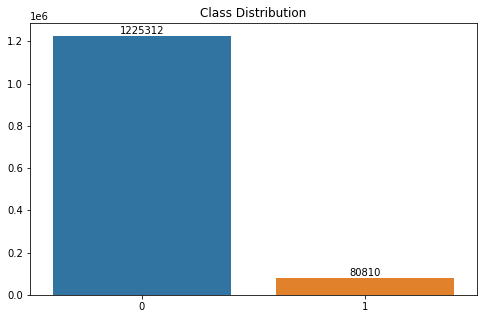

In [31]:
# Plot target distibution
target_count = df["target"].value_counts()

plt.figure(figsize = (8, 5))
ax = sns.barplot(target_count.index, target_count.values)
rects = ax.patches
labels = target_count.values
for rect, label in zip(rects, labels):
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height() + 5,
           label, ha = "center", va = "bottom")
plt.title("Class Distribution", fontsize = 12)
plt.show()

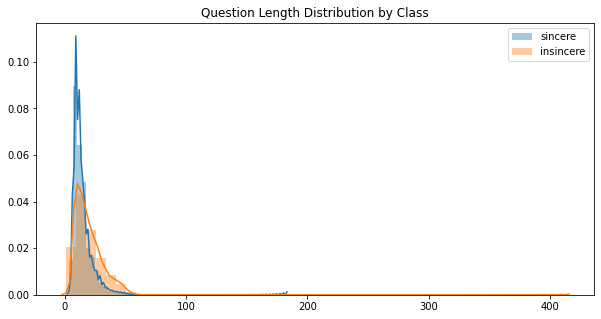

Average Number of Tokens Positive Sentiment: 14.107855795095453
Median Number of Tokens Positive Sentiment 12.0
Max Number of Tokens Positive Sentiment 182.0
Min Number of Tokens Positive Sentiment 3.0
Average Number of Tokens Negative Sentiment: 19.585472095037744
Median Number of Tokens Negative Sentiment 17.0
Max Number of Tokens Negative Sentiment 412.0
Min Number of Tokens Negative Sentiment 1.0


NameError: ignored

In [32]:
# Plot sentence length distribution for both class
plt.figure(figsize = (10, 5))
sns.distplot(poswordcount, hist = True, label = "sincere")
sns.distplot(negwordcount, hist = True, label = "insincere")
plt.legend(fontsize = 10)
plt.title("Question Length Distribution by Class", fontsize = 12)
plt.show()

print('Average Number of Tokens Positive Sentiment: {}'.format(np.mean(poswordcount, axis=0)))
print("Median Number of Tokens Positive Sentiment",np.median(poswordcount, axis=0))
print("Max Number of Tokens Positive Sentiment",np.max(poswordcount, axis=0))
print("Min Number of Tokens Positive Sentiment",np.min(poswordcount, axis=0))

print('Average Number of Tokens Negative Sentiment: {}'.format(np.mean(negwordcount, axis=0)))
print("Median Number of Tokens Negative Sentiment",np.median(negwordcount, axis=0))
print("Max Number of Tokens Negative Sentiment",np.max(negwordcount, axis=0))
print("Min Number of Tokens Negative Sentiment",np.min(negwordcount, axis=0))

sns.boxplot(x=poswordcount, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, width=0.8, dodge=True, fliersize=5, linewidth=None, whis=1.5, ax=None, **kwargs)

## Word Frequency plot for sincere and insecere question

In [0]:
nltk.download('stopwords')
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from nltk.corpus import stopwords

def find_ngrams(sentence, n_gram = 1, remove_stopwords=False):
    '''
    Function to find n_gram of a sentence
    Args: sentence: string 
          n_gram: int for number of gram
    Returns: list_ngram: list of str of ngram
    '''
    list_word = sentence.lower().split(' ')
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        list_word = [w for w in list_word if not w in stops]
    
    n_grams = zip(*[list_word[i:] for i in range(n_gram)])
    list_ngram = [" ".join(ngram) for ngram in n_grams]
    return  list_ngram

def plot_bar(df_sincere, df_insincere, ngram = 1, color = 'lightblue', remove_stopwords=False, num_word = 10, verbose = True, desc = True):
    '''
    Function to plot a bar plot of word occurence for both sincere and insincere question for top num_word words

    Args: df_sincere: pandas dataframe sincere question
          df_insincere: pandas dataframe insincere question
          ngram: int ngram length
          color: str color of the bars
          remove_stopwords: bool for remove stopwords 
          num_words: int for top num_words occurence plot
          verbose: bool for printing tqdm 
          desc: bool for sorting in descending order the number of occurence
    Returns:
    '''
    vocab_sincere = Counter()
  
    for sentence in tqdm(df_sincere['question_text'], disable = (not verbose)):
        for word in find_ngrams(sentence, ngram, remove_stopwords):
            vocab_sincere[word] += 1
    
    df_sorted_sincere = pd.DataFrame(sorted(vocab_sincere.items(), key=lambda x: x[1], reverse= desc))
    df_sorted_sincere.columns = ["word", "occurence"]

    vocab_insincere = Counter()
    for sentence in tqdm(df_insincere['question_text'], disable = (not verbose)):
        for word in find_ngrams(sentence, ngram, remove_stopwords):
            vocab_insincere[word] += 1
    
    df_sorted_insincere = pd.DataFrame(sorted(vocab_insincere.items(), key=lambda x: x[1], reverse= desc))
    df_sorted_insincere.columns = ["word", "occurence"]

    # Plot figure
    fig, ax = plt.subplots(1, 2, figsize=(10,6))
    sns.barplot(x="occurence", y="word", data=df_sorted_sincere.head(num_word), ax=ax[0], color=color)
    sns.barplot(x="occurence", y="word", data=df_sorted_insincere.head(num_word), ax=ax[1], color=color)

    ax[0].set_xlabel('Word count', size=12)
    ax[0].set_ylabel('Words', size=12)
    ax[0].set_title('Sincere questions', size=12)

    ax[1].set_xlabel('Word count', size=12)
    ax[1].set_ylabel('Words', size=12)
    ax[1].set_title('Insincere questions', size=12)

    # fig.subplots_adjust(wspace=0.25)
    fig.tight_layout(pad=3.0)
    plt.show()
    print(vocab_sincere)
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



100%|██████████| 7508/7508 [00:00<00:00, 80834.44it/s]

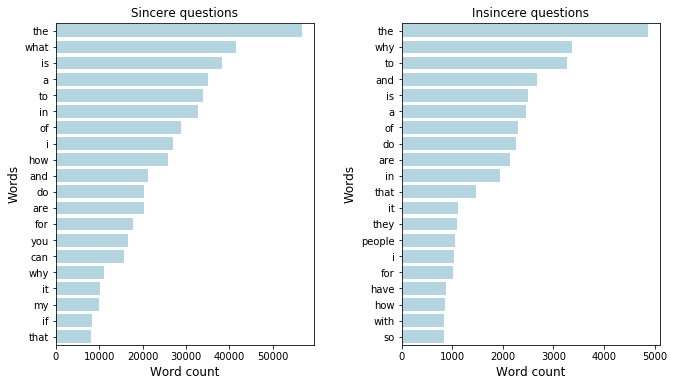

Counter({'the': 56656, 'what': 41528, 'is': 38310, 'a': 35147, 'to': 33876, 'in': 32756, 'of': 28785, 'i': 27130, 'how': 25870, 'and': 21144, 'do': 20282, 'are': 20237, 'for': 17779, 'you': 16581, 'can': 15835, 'why': 11135, 'it': 10137, 'my': 9882, 'if': 8298, 'that': 8172, 'with': 7900, 'or': 7875, 'on': 7729, 'be': 7660, 'have': 7445, 'does': 7424, 'which': 6002, 'your': 5953, 'an': 5910, 'from': 5876, 'best': 5721, 'should': 5504, 'get': 5435, 'would': 5283, 'when': 5238, 'as': 4800, 'some': 4798, 'there': 4387, 'will': 4269, 'who': 4200, 'at': 4125, 'about': 3573, 'was': 3549, 'people': 3516, 'by': 3492, 'any': 3480, 'did': 3430, 'like': 3428, 'we': 3342, 'not': 3326, 'good': 3304, 'they': 2769, 'one': 2743, 'after': 2719, 'has': 2671, 'where': 2565, 'their': 2491, 'so': 2438, 'me': 2311, 'make': 2288, 'between': 2225, 'but': 2224, 'most': 2204, 'more': 1999, 'think': 1996, 'many': 1909, 'than': 1892, 'much': 1875, 'this': 1859, 'all': 1842, 'use': 1841, 'someone': 1806, 'other': 

In [0]:
plot_bar(df_sincere, df_insincere, ngram = 1, remove_stopwords=False, num_word = 20)

In [0]:
plot_bar(df_sincere, df_insincere, ngram = 1, color='green', remove_stopwords=True, num_word = 20)

 73%|███████▎  | 83431/113918 [00:10<00:03, 7668.68it/s]

KeyboardInterrupt: ignored

100%|██████████| 80810/80810 [00:11<00:00, 6783.03it/s]


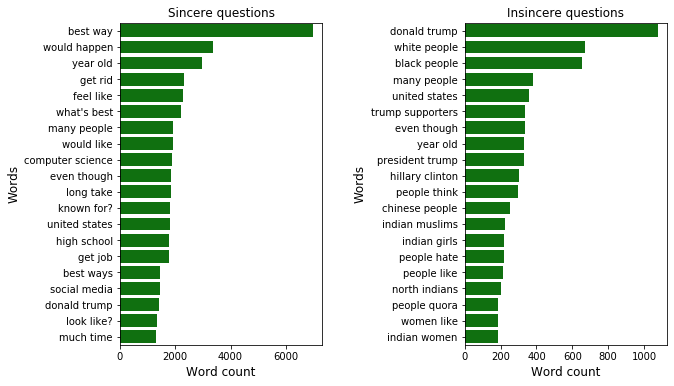

In [0]:
plot_bar(df_sincere, df_insincere, ngram = 2, color='green', remove_stopwords=True, num_word = 20)

100%|██████████| 80810/80810 [00:12<00:00, 6650.88it/s]


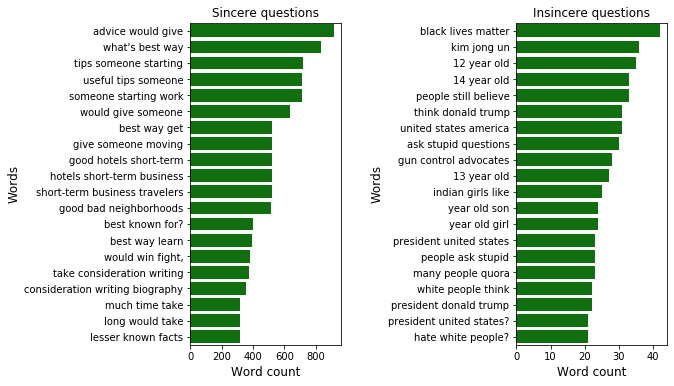

In [0]:
plot_bar(df_sincere, df_insincere, ngram = 3, color='green', remove_stopwords=True, num_word = 20)

## Check the coverage of the vocab by the embeddings

In [0]:
def check_embedding_coverage(vocab, embedding_index, desc = True):
    '''
    Function to get the coverage of a particular embedding of the dataset

    Args: vocab: dictionnary of word and their count
          embedding: Word2VecKeyedVectors using gensim 
    Returns: sorted_oov: dictionnary for out of vocabulary sorted by num of occurence in dataset
    '''

    num_word_in = 0 # num of total word that are covered in the embedding
    num_word_out = 0 # num of total word that are not covered in the embedding
    oov = {} # Out of vocabulary dictionnary
    embedding = {}

    for word in tqdm(vocab):
        try:
            embedding[word] = embedding_index[word]
            num_word_in += vocab[word]
        except:
            oov[word] = vocab[word]
            num_word_out += vocab[word]
            pass

    print('Found embeddings for {:.2%} of vocab'.format(len(embedding) / len(vocab)))
    print('Found embeddings for {:.2%} of all text'.format(num_word_in / (num_word_in + num_word_out)))

    sorted_oov = sorted(oov.items(), key = operator.itemgetter(1), reverse=desc)

    return sorted_oov

In [0]:
from gensim.models import KeyedVectors
import numpy as np

glove = './glove.840B.300d/glove.840B.300d.txt'
paragram =  './paragram_300_sl999/paragram_300_sl999.txt'
wiki_news = './wiki-news-300d-1M/wiki-news-300d-1M.vec'
google = './GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin'

def load_embedding(file):
    def get_coefs(word,*arr): 
        return word, np.asarray(arr, dtype='float16')
    
    if file == './wiki-news-300d-1M/wiki-news-300d-1M.vec':
        embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(file) if len(o)>100)
    elif file == './GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin':
        embeddings_index = KeyedVectors.load_word2vec_format(file, binary=True)
    else:
        print("imported glove")
        embeddings_index = dict(get_coefs(*o.split(" ")) for o in open(file, encoding='latin'))
        
    return embeddings_index

In [35]:
embeddings_index = load_embedding(glove)

imported glove


In [0]:
from tqdm._tqdm_notebook import tqdm_notebook
oov = check_embedding_coverage(vocab,embeddings_index)
oov[:20]

As we can see couple type of word are not in the embeddings:
- Contractions
- Words with punctuation in them

Next let's try to use tokenizer 

In [0]:
import nltk
from tqdm._tqdm_notebook import tqdm_notebook
tokenizer = nltk.tokenize.TweetTokenizer()

vocab = build_vocab(df['question_text'], tokenizer=tokenizer)
oov = check_embedding_coverage(vocab,embeddings_index)
oov[:20]


### Contractions and special character removal

In [0]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }

In [0]:
def clean_contractions(text, mapping):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    return text

In [40]:
punct = "/-'?!.,#$%\'()*+-/:;<=>@[\\]^_`{|}~" + '""“”’' + '∞θ÷α•à−β∅³π‘₹´°£€\×™√²—–&'
punct_mapping = {"‘": "'", "₹": "e", "´": "'", "°": "", "€": "e", "™": "tm", "√": " sqrt ", "×": "x", "²": "2", "—": "-", "–": "-", "’": "'", "_": "-", "`": "'", '“': '"', '”': '"', '“': '"', "£": "e", '∞': 'infinity', 'θ': 'theta', '÷': '/', 'α': 'alpha', '•': '.', 'à': 'a', '−': '-', 'β': 'beta', '∅': '', '³': '3', 'π': 'pi', }

def unknown_punct(embed, punct):
    unknown = ''
    for p in punct:
        if p not in embed:
            unknown += p
            unknown += ' '
    return unknown

print("Unkown punctuation for Glove :")
print(unknown_punct(glove, punct))

def clean_special_chars(text, punct, mapping):
    for p in mapping:
        text = text.replace(p, mapping[p])
    
    for p in punct:
        text = text.replace(p, f' {p} ')
    
    specials = {'\u200b': ' ', '…': ' ... ', '\ufeff': '', 'करना': '', 'है': ''}  # Other special characters that I have to deal with in last
    for s in specials:
        text = text.replace(s, specials[s])
    
    return text

Unkown punctuation for Glove :
- ' ? ! , # $ % ' ( ) * + - : ; < = > @ [ \ ] ^ _ ` { | } ~ " " “ ” ’ ∞ θ ÷ α • à − β ∅ ³ π ‘ ₹ ´ ° £ € \ × ™ √ ² — – & 


In [0]:
df['cleaned_text'] = df['question_text'].apply(lambda x: clean_contractions(x, contraction_mapping))
df['cleaned_text'] = df['question_text'].apply(lambda x: clean_special_chars(x, punct, punct_mapping))

In [42]:
pd.options.display.max_colwidth = 100

df['question_text'].head(10)

0                               How did Quebec nationalists see their province as a nation in the 1960s?
1                      Do you have an adopted dog, how would you encourage people to adopt and not shop?
2                                    Why does velocity affect time? Does velocity affect space geometry?
3                                              How did Otto von Guericke used the Magdeburg hemispheres?
4                          Can I convert montra helicon D to a mountain bike by just changing the tyres?
5                               Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?
6    Why does Quora automatically ban conservative opinions when reported, but does not do the same f...
7                                  Is it crazy if I wash or wipe my groceries off? Germs are everywhere.
8    Is there such a thing as dressing moderately, and if so, how is that different than dressing mod...
9    Is it just me or have you ever been in this phase 

In [0]:
df['cleaned_text'].head(10)

In [0]:
vocab = build_vocab(df['cleaned_text'])

oov = check_embedding_coverage(vocab,embeddings_index)
oov[:30]

## KMeans

In [44]:

from sklearn.cluster import KMeans
from collections import Counter 
import numpy as np

embewdding=np.zeros(59504)

embedding=[]
vocablist=[key for key, _ in vocab[0].most_common()]


commonwords=set(vocablist).intersection(embeddings_index.keys())
print("size",len(commonwords))
a=np.array(list(commonwords))

i=0
for word in a:
  
 
  embedding.insert(i,embeddings_index[word])
  i=i+1
  
  

print("Start kmeans")
kmeans = KMeans(n_clusters=750).fit(embedding)
clusters=list(kmeans.labels_)
word_centroid_map_z=dict(zip(list(embeddings_index.keys()), clusters))
word_centroid_m=dict(zip(a, clusters))
print(len(word_centroid_m))

size 178508
Start kmeans
178508


In [0]:

def print_clusters(word_centroid_map_z, model_name):

    print("The clusters for {0} are....".format(model_name))

    i=0
    while i<750:
      k=0
      print(" ")
      print("Words in Cluster ",i+1)
      for word, cluster in word_centroid_map_z.items():    
        if k==30:
          i=i+1 
          break 
        if cluster == i:
            print("Word: ",word)
            k=k+1

print_clusters(word_centroid_m, "model1")


## Create Design Matrix

In [0]:
#import os
#os.chdir("drive/My Drive/CSEProject")
def process_question(question):
    
    tokens = nltk.word_tokenize(question)
   
    
    
    return tokens


def create_bag_of_centroids(tokenized_question, word_centroid_map, num_clusters):


    bag_of_centroids=np.zeros(num_clusters)
   
    for  token in tokenized_question:
      
      if token in word_centroid_map:
       
        cluster=word_centroid_map[token]
        bag_of_centroids[cluster]+=1
           

    return bag_of_centroids


def create_design_matrices(data, cleaned_questions, word_centroid_map_z1,  num_clusters):

    x1_data=np.zeros((len(cleaned_questions), num_clusters))

    i=0
    for q in cleaned_questions:
      x1_data[i,:]=create_bag_of_centroids(q,word_centroid_map_z1,num_clusters)
  
      i=i+1

    return x1_data




In [46]:
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, KFold

import nltk
nltk.download('punkt')

test_df2 = pd.read_csv('val_split.csv')
train_df2 = pd.read_csv('train_split.csv')
val_df2 = pd.read_csv('val_split.csv')
y1_train=train_df2['target']

cleaned_questions=[]
cleaned_questions_test=[]
for q in train_df2["cleaned_text"]:
  
    cleaned_questions.append(process_question(q))
print(val_df2.columns.tolist())
for q2 in val_df2["cleaned_text"]:
    cleaned_questions_test.append(process_question(q2))

print("building x1_train")
x1_train = create_design_matrices(train_df2,cleaned_questions,word_centroid_m,750)
print("building x1_test")
x1_test = create_design_matrices(val_df2,cleaned_questions_test,word_centroid_m,750)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['qid', 'question_text', 'target', 'no_punctuation_lower', 'question_len', 'text_no_contraction', 'cleaned_text', 'contain_math_equation', 'unknow_emb_count', 'capitals', 'total_length', 'caps_vs_length']
building x1_train
building x1_test


## Training and Cross Validation of SVM

In [0]:

from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
print(svm.LinearSVC(random_state=0, class_weight='balanced').get_params().keys())

param_grid =  {'C': [0.03162278,
0.08483429, 0.22758459, 0.61054023, 1, 1.63789371, 4.39397056,
11.78768635, 31.6227766]} 

grid = GridSearchCV(svm.LinearSVC(random_state=0, class_weight='balanced'), param_grid, refit = True, verbose = 3,scoring=make_scorer(f1_score, greater_is_better=True),cv=10) 
  

grid.fit(x1_train, train_df2["target"]) 




## Testing SVM

In [0]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
bestC=1
clf = svm.LinearSVC(random_state=0, C=bestC,class_weight='balanced')
clf.fit(x1_train,y1_train)  
print("predicting")

y_pred = clf.predict(x1_test)   

precision = metrics.precision_score(test_df2["target"], y_pred, pos_label=1)
recall = metrics.recall_score(test_df2["target"], y_pred, pos_label=1)
f1 = metrics.f1_score(test_df2["target"], y_pred, pos_label=1)

print("precision",precision)
print("recall",recall)
print("F1",f1)



##Data Analysis (Chi Squared)

In [3]:


from nltk.corpus import stopwords
import nltk
import pandas as pd
nltk.download('stopwords')
nltk.download('punkt')
train3 = pd.read_csv('train.csv')


def process_question2(review):
    stop_words = set(stopwords.words('english'))

    tokens = nltk.word_tokenize(review)
    resultlist = [i for i in tokens if not i in stop_words]
 
 

    result=" ".join( resultlist )
    return result
cleaned_questions3=[]

for q in train3["question_text"]:
  
    cleaned_questions3.append(process_question2(q))




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
from sklearn.feature_extraction.text import CountVectorizer
def process_question3(review):

    tokens = nltk.word_tokenize(review)
 

    result=" ".join( tokens )
    return result
def design_matrix2(cleaned_reviews):
   

    vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 500) 


    train_data_features = vectorizer.fit_transform(cleaned_reviews)


    X_counts = train_data_features.toarray()

    featurenames=vectorizer.get_feature_names()
    


    return X_counts,featurenames


X_counts,featurenames= design_matrix2(cleaned_questions3)



In [6]:
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np
y1_train=train3['target']
ch22 = SelectKBest(chi2, k=20)
X_counts_chi = ch22.fit_transform(X_counts, train3["target"])

featuresreturned=ch22.get_support(indices=True)
fn=np.asarray(featurenames)
selectedtokens=fn[featuresreturned]
print(selectedtokens)
p=0.0000000000
chi, p=chi2(X_counts_chi,train3["target"])
print("Chi Squared values",chi)
print("p values",p)

['americans' 'black' 'chinese' 'donald' 'gay' 'girls' 'hate' 'indian'
 'indians' 'men' 'muslim' 'muslims' 'people' 'quora' 'sex' 'trump' 'what'
 'white' 'why' 'women']
Chi Squared values [22932.9430577  14580.8023889   8195.17760656  7782.76615893
  9449.30491807 11498.35786079 12033.89077363  6813.79680816
 19536.48259014 23551.52424202 13310.42556875 35376.84038599
 27459.23440735  6417.4937338   7870.29630884 37752.79452921
 16286.57945141 24237.21771424 68567.62736314 34746.63669313]
p values [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
